In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB

# Load and clean dataset
data = pd.read_csv('Completed_Survey_500_Responses.csv')
data = data.drop_duplicates()
data = data.drop(columns=[
    'Timestamp',
    '7. For what purposes do you primarily use ChatGPT? (Select all that apply)',
    '21. How has ChatGPT influenced your academic performance? ',
    '20. What other changes have you noticed in your learning habits?',
    '12. What other benefits have you experienced from using ChatGPT?'
])

# Preprocess age column
def categorize_age(age):
    if age.lower() == "under 15":
        return 10
    elif age.lower() == "above 40":
        return 45
    else:
        return int(age)

data['1. What is your age?'] = data['1. What is your age?'].apply(categorize_age)
bins = [0, 15, 20, 25, 30, 35, 40, 50]
labels = [1, 2, 3, 4, 5, 6, 7]
data['Age_Group'] = pd.cut(data['1. What is your age?'], bins=bins, labels=labels, right=False)
data.drop(columns=['1. What is your age?'], inplace=True)

print("Done!!!")

Done!!!


C:\Users\IQBAL\AppData\Local\Temp\ipykernel_14976\2009118093.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=data, palette='viridis')


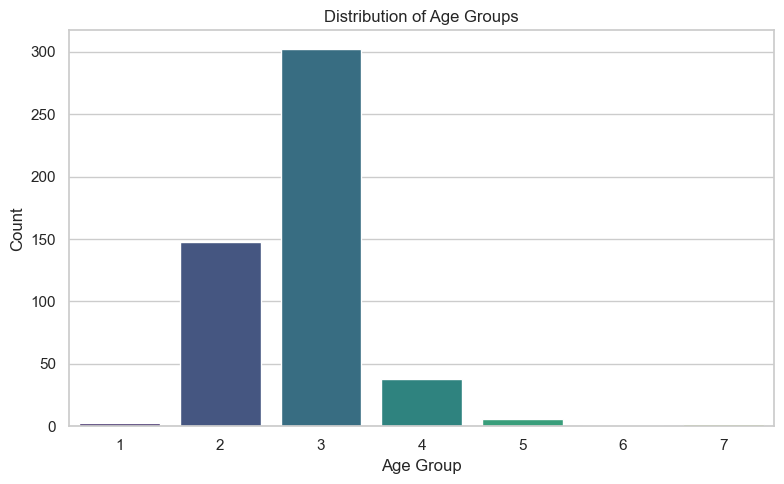

C:\Users\IQBAL\AppData\Local\Temp\ipykernel_14976\2009118093.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='19. Do you find yourself relying more on AI tools since using ChatGPT?',


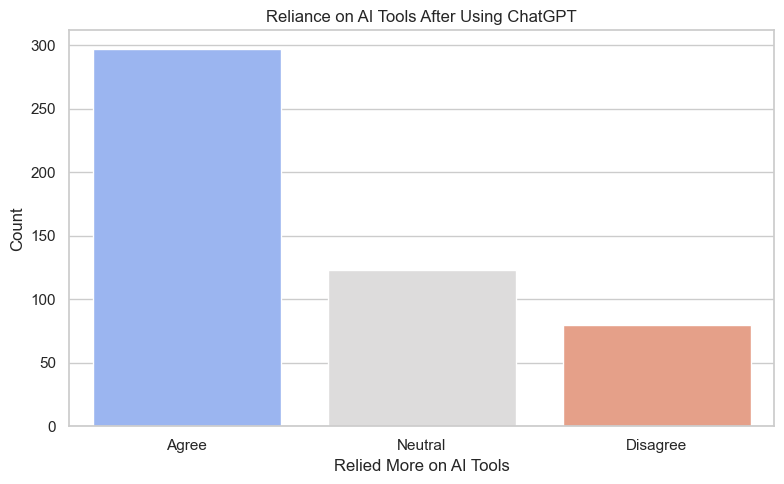

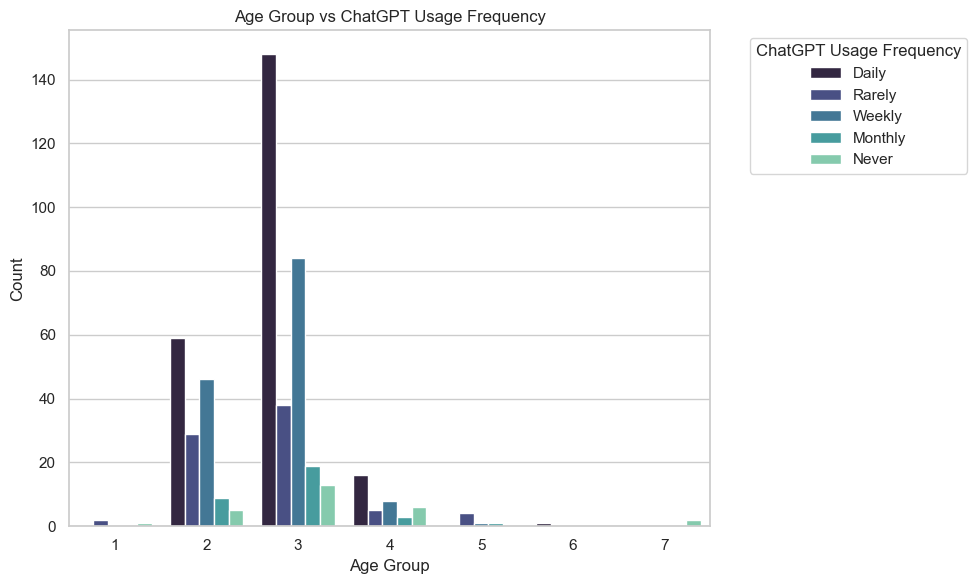

C:\Users\IQBAL\AppData\Local\Temp\ipykernel_14976\2009118093.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


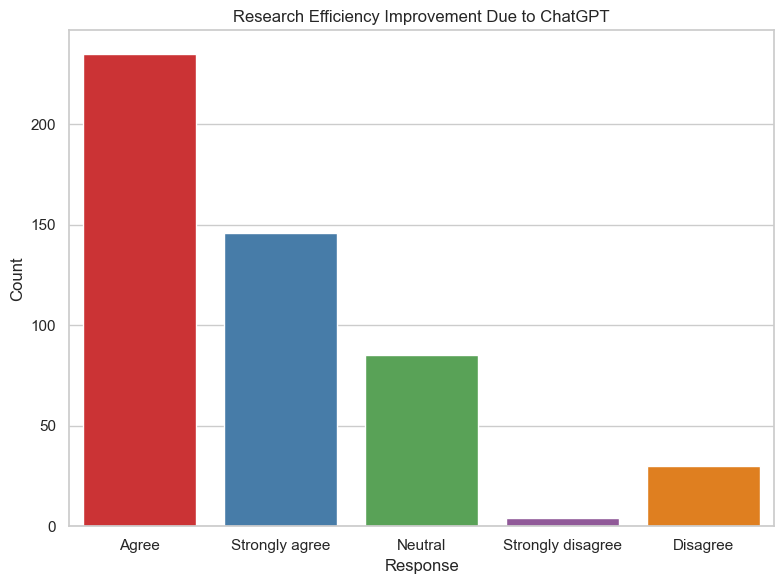

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization Setup
sns.set_theme(style="whitegrid")

# 1. Distribution of Age Groups
if 'Age_Group' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Age_Group', data=data, palette='viridis')
    plt.title('Distribution of Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Age_Group' not found in the dataset.")

# 2. ChatGPT Usage - Reliance on AI
if '19. Do you find yourself relying more on AI tools since using ChatGPT?' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='19. Do you find yourself relying more on AI tools since using ChatGPT?', 
                  data=data, palette='coolwarm')
    plt.title('Reliance on AI Tools After Using ChatGPT')
    plt.xlabel('Relied More on AI Tools')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("Column '19. Do you find yourself relying more on AI tools since using ChatGPT?' not found.")

# 3. Age Group vs. ChatGPT Usage Frequency
if 'Age_Group' in data.columns and '6. How frequently do you use ChatGPT?' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Age_Group', hue='6. How frequently do you use ChatGPT?', 
                  data=data, palette='mako')
    plt.title('Age Group vs ChatGPT Usage Frequency')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title='ChatGPT Usage Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for 'Age Group vs Usage Frequency' plot are missing.")


# 4. Bar Plot: Perceived Research Efficiency Benefit
if '9. Do you believe ChatGPT has improved your research efficiency?' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(
        x='9. Do you believe ChatGPT has improved your research efficiency?', 
        data=data, palette='Set1'
    )
    plt.title('Research Efficiency Improvement Due to ChatGPT')
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("Column '9. Do you believe ChatGPT has improved your research efficiency?' not found.")


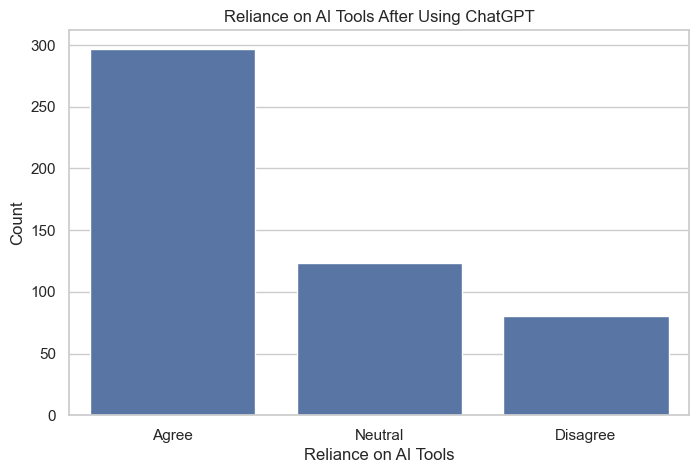

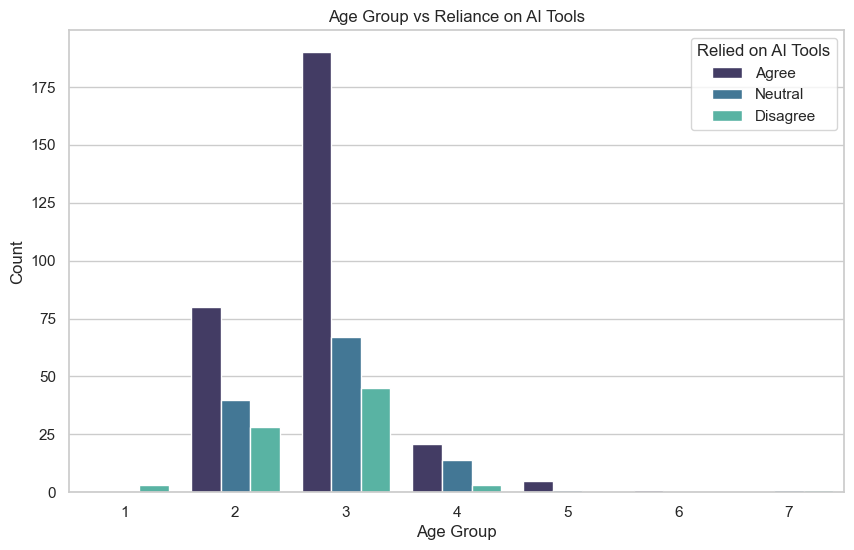

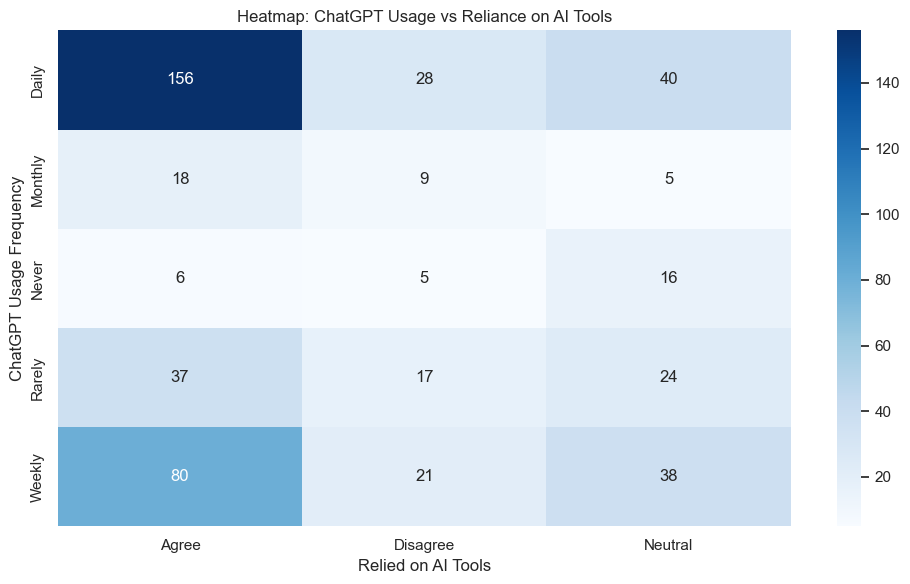


Naive Bayes Accuracy: 72.67%

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        92
           1       0.71      0.22      0.33        23
           2       0.56      0.63      0.59        35

    accuracy                           0.73       150
   macro avg       0.69      0.58      0.59       150
weighted avg       0.72      0.73      0.70       150



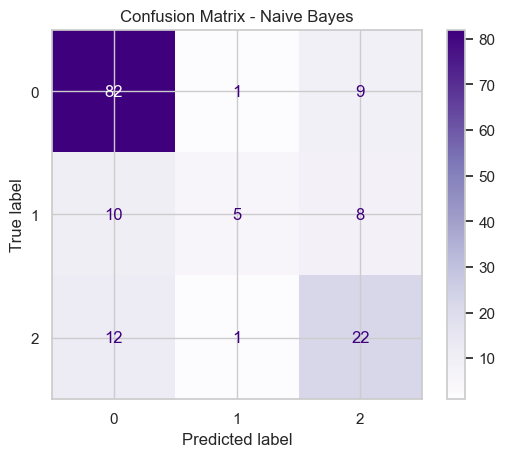


Random Forest Accuracy: 69.33%

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.70      0.93      0.80        92
           1       0.80      0.17      0.29        23
           2       0.64      0.40      0.49        35

    accuracy                           0.69       150
   macro avg       0.71      0.50      0.53       150
weighted avg       0.70      0.69      0.65       150



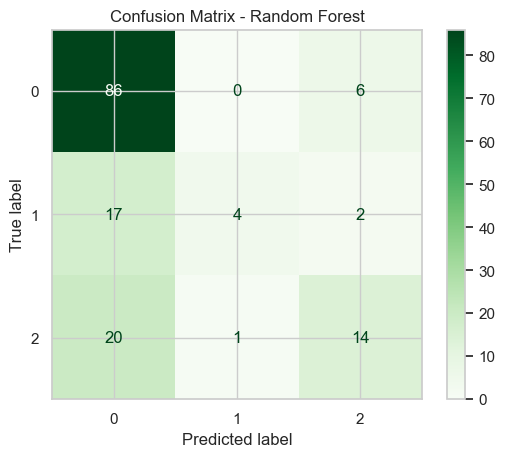

In [93]:


# Visualizations
plt.figure(figsize=(8, 5))
sns.countplot(x='19. Do you find yourself relying more on AI tools since using ChatGPT?', data=data)
plt.title('Reliance on AI Tools After Using ChatGPT')
plt.xlabel('Reliance on AI Tools')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='19. Do you find yourself relying more on AI tools since using ChatGPT?',
              data=data, palette='mako')
plt.title('Age Group vs Reliance on AI Tools')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Relied on AI Tools')
plt.show()

heatmap_data = data.groupby([
    '6. How frequently do you use ChatGPT?',
    '19. Do you find yourself relying more on AI tools since using ChatGPT?'
]).size().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='Blues', cbar=True)
plt.title('Heatmap: ChatGPT Usage vs Reliance on AI Tools')
plt.xlabel('Relied on AI Tools')
plt.ylabel('ChatGPT Usage Frequency')
plt.tight_layout()
plt.show()

# Impute and encode
data = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(data), columns=data.columns)
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Train/Test split
X = data.drop(columns=['19. Do you find yourself relying more on AI tools since using ChatGPT?'])
y = data['19. Do you find yourself relying more on AI tools since using ChatGPT?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("\nNaive Bayes Accuracy:", f"{accuracy_score(y_test, y_pred_nb) * 100:.2f}%")
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))
cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm_nb).plot(cmap='Purples')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Accuracy:", f"{accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()
